In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split

In [122]:
df=pd.read_csv("HR_comma_sep.csv")
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
print("No of data",len(df))

No of data 14999


## Analysing Data


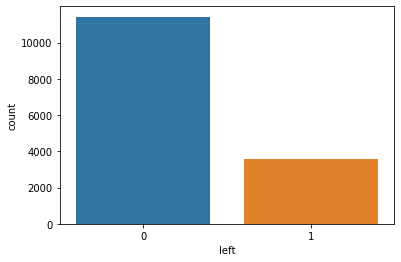

In [9]:
sns.countplot(x="left",data=df)

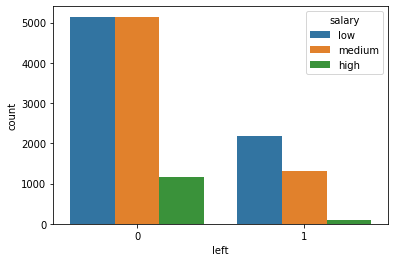

In [11]:
sns.countplot(x="left",hue="salary",data=df)

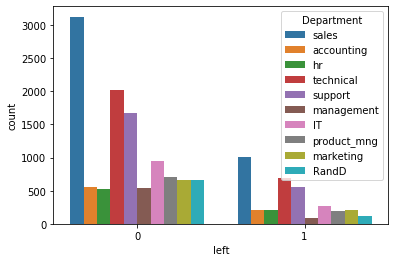

In [13]:
sns.countplot(x="left",hue='Department',data=df)

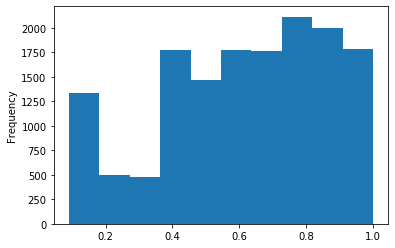

In [14]:
df["satisfaction_level"].plot.hist()

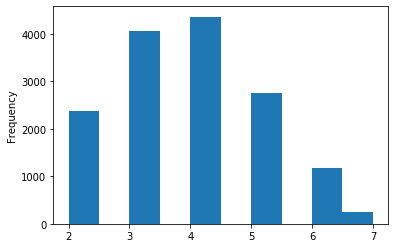

In [15]:
df["number_project"].plot.hist()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


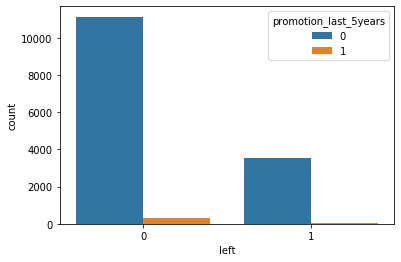

In [18]:
sns.countplot(x="left",hue="promotion_last_5years",data=df)

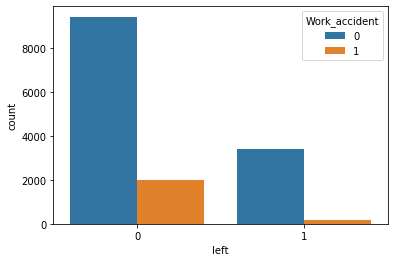

In [19]:
sns.countplot(x="left",hue="Work_accident",data=df)

## Data Wrangling

In [20]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

## Data Cleaning


In [125]:
salary=pd.get_dummies(df['salary'],drop_first=True)
salary
department=pd.get_dummies(df['Department'],drop_first=True)
department                           

,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,1,0


In [126]:
df=pd.concat([df,salary,department],axis=1)

In [127]:
df=df.drop(['salary','Department'],axis=1)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,low,medium,...,medium,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## Prediction

In [128]:

X_train,X_test,y_train,y_test=train_test_split(df[["satisfaction_level"]],df.left,test_size=0.1)
len(X_train)

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)
X_test,model.predict(X_test)
model.score(X_train,y_train)

0.7670197792429069

In [131]:
X_train,X_test,y_train,y_test=train_test_split(df[["Work_accident"]],df.left,test_size=0.1)
len(X_train)

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)
X_test,model.predict(X_test)
model.score(X_train,y_train)

0.7618342099414771

In [130]:
X_train,X_test,y_train,y_test=train_test_split(df[["time_spend_company"]],df.left,test_size=0.1)
len(X_train)

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)
X_test,model.predict(X_test)
model.score(X_train,y_train)

0.7468701385287799

In [134]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(["left"],axis=1),df.left,test_size=0.1)
len(X_train)

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs',max_iter=10000)
model.fit(X_train,y_train)
X_test,model.predict(X_test)
model.score(X_train,y_train)

0.7905770797836876